<a href="https://colab.research.google.com/github/kshuravi/Marvel_vs_DC_Film_EDA/blob/main/Marvel_vs_DC_Film_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction

The goal of this project is to scrape tables from websites, clean them and analyse data. I came up with a topic that interests me. FILMS! Not any film, more precisely SUPERHERO FILMS! (Apologies for the caps lock though)

I scraped tables that contain the details of the Live Action Films based on Marvel Comics and DC Comics characters. These tables are located in two different links on wikipedia. The tables have similar features, e.g. "Year", "Title", "Production studio(s)", "Notes". Scraping them was not an easy job for me as a beginner in Data Science. But, I pulled it off anyway!

The areas that I have focused on are:

* How many Live Action Films were produced based on DC Comics and Marvel Comics?
* Which comics publication based live action films got more nominations for the Oscars than the other?
* Which live action film got most nominations?
* Which live action film is responsible for getting overall more nominations for its comic by beating the other? (This one surprised me!)
* Which comic based film production got more Oscar Win Counts?

I have excluded the details of the upcoming films as they do not contribute any major information for my analysis


## Importing the necessary libraries

In [ ]:
import bs4 as bs
import urllib.request
import pandas as pd
import numpy as np
import seaborn as sns
import re
from pandas import DataFrame
import matplotlib.pyplot as plt
from nltk import flatten
sns.set()
%matplotlib inline

## Scraping data for List of Live Action Films based on Marvel Comics Publications

In [ ]:
sauce1 = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_films_based_on_Marvel_Comics_publications")
soup1 = bs.BeautifulSoup(sauce1, 'lxml')

Scraping the column names

In [ ]:
# Scraping the column names
table1 = soup1.find('table')
tbody1 = table1.select("tbody")
th1 = table1.select("th")
column_names1 = [str(c.string).strip() for c in th1]
column_names1

['Year', 'Title', 'Production studio(s)', 'Notes', 'Upcoming']

Scraping the row data

In [ ]:
# Finding all table rows and excluding unnecessary ones
table_rows1 = table1.find_all('tr')[1:61]

# Keeping them in a list with all table data
row_list1 = []
for tr1 in table_rows1:
  td1 = tr1.find_all('td')
  row1 = [str(i1.get_text()).strip() for i1 in td1]

# Trying to find Year values in strings and converting them to integer
  if len(row1[0])==4:
    try:
      row1[0]=int(row1[0])
    except:
      continue
  row_list1.append(row1)

# Fixing rowspan fetched from html. Also cleaning and replacing rows with appropriate values
row_list_marvel = []
for b1 in row_list1:
  if isinstance(b1[0], str) and len(b1)==3:
    b1.insert(0, '')
  if isinstance(b1[0], str) and len(b1)==2:
    b1.insert(0, '')
    b1.insert(1, '')
  if b1[1]=='':
    try:
      b1[1]=b1[2]
      b1[2]=""
    except:
      continue
  if len(b1)==3:
    b1.append('None')
  else:
    b1
  row_list_marvel.append(b1)

Cleaning the data

In [ ]:
# Converting the list into a dataframe
df1 = pd.DataFrame(row_list_marvel, columns=column_names1[:4])

# Replacing new missing values with NaN
df1['Year'] = df1['Year'].replace('', np.NaN)

# Filling the NaN values with the previous row data (fixing data from rowspan issue again!)
df1['Year'] = df1['Year'].fillna(method='ffill')

# Converting all Year values to integers that became floats in the process
df1['Year'] = df1['Year'].astype(float).astype(int)

# Switching some rows from Production Studio(s) with the None rows from Notes which appeared in the Notes after shifting the rows to right to fix rowspan issue
wrongDataIdx1 = (df1['Notes'] == 'None')
df1.loc[wrongDataIdx1, ['Production studio(s)', 'Notes']] = df1.loc[wrongDataIdx1, ['Notes', 'Production studio(s)']].values

# Filling up None with NaN values and then with appropriate values
df1['Production studio(s)'] = df1['Production studio(s)'].replace('None', np.NaN)
df1['Production studio(s)'] = df1['Production studio(s)'].replace("", np.NaN)
df1['Production studio(s)'] = df1['Production studio(s)'].fillna(method='ffill')

Here's the cleaned table for List of Live Action Films based on Marvel Comics Publications

In [ ]:
df1.head()

,Year,Title,Production studio(s),Notes
0,1944,Captain America,Republic Pictures,15-chapter serial film; Marvel was then known ...
1,1986,Howard the Duck,Universal Pictures,Co-produced by Lucasfilm
2,1989,The Punisher,New World Pictures,Direct-to-video in U.S.; limited theatrical re...
3,1990,Captain America,21st Century Film Corporation,Co-produced by Jadran Film; direct-to-video in...
4,1994,The Fantastic Four,Constantin Film,Unreleased


## Scraping data for List of Live Action Films based on DC Comics Publications

In [ ]:
sauce2 = urllib.request.urlopen("https://en.wikipedia.org/wiki/List_of_films_based_on_DC_Comics_publications")
soup2 = bs.BeautifulSoup(sauce2, 'lxml')

Scraping the column names

In [ ]:
table2 = soup2.find('table')
tbody2 = table2.select("tbody")
th2 = table2.select("th")
column_names2 = [str(c.string).strip() for c in th2]
column_names2

['Year', 'Title', 'Production studio(s)', 'Notes', 'Upcoming']

Scraping the row data

In [ ]:
# Finding all table rows and excluding unnecessary ones
table_rows2 = table2.find_all('tr')[1:35]

# Keeping them in a list with all table data
row_list2 = []
for tr2 in table_rows2:
  td2 = tr2.find_all('td')

# Trying to find Year values in strings and converting them to integer
  row2 = [str(i2.get_text()).strip() for i2 in td2]
  if len(row2[0])==4:
    try:
      row2[0]=int(row2[0])
    except:
      continue
  row_list2.append(row2)

# Fixing rowspan fetched from html. Also cleaning and replacing rows with appropriate values
row_list_dc = []
for b2 in row_list2:
  if isinstance(b2[0], str) and len(b2)==3:
    b2.insert(0, '')
  if isinstance(b2[0], str) and len(b2)==2:
    b2.insert(0, '')
    b2.insert(1, '')
  if b2[1]=='':
    try:
      b2[1]=b2[2]
      b2[2]=""
    except:
      continue
  if len(b2)==3:
    b2.append('None')
  else:
    b2
  row_list_dc.append(b2)

Cleaning the data

In [ ]:
# Converting the list into a dataframe
df2 = pd.DataFrame(row_list_dc, columns=column_names2[:4])

# Replacing new missing values with NaN
df2['Year'] = df2['Year'].replace('', np.NaN)

# Filling the NaN values with the previous row data (fixing data from rowspan issue again!)
df2['Year'] = df2['Year'].fillna(method='ffill')

# Converting all Year values to integers that became floats in the process
df2['Year'] = df2['Year'].astype(float).astype(int)

# Switching some rows from Production Studio(s) with the None rows from Notes which appeared in the Notes after shifting the rows to right to fix rowspan issue
wrongDataIdx2 = (df2['Notes'] == 'None')
df2.loc[wrongDataIdx2, ['Production studio(s)', 'Notes']] = df2.loc[wrongDataIdx2, ['Notes', 'Production studio(s)']].values

# Filling up None with NaN values and then with appropriate values
df2['Production studio(s)'] = df2['Production studio(s)'].replace('None', np.NaN)
df2['Production studio(s)'] = df2['Production studio(s)'].replace("", np.NaN)
df2['Production studio(s)'] = df2['Production studio(s)'].fillna(method='ffill')

Here's the cleaned table for List of Live Action Films based on DC Comics Publications

In [ ]:
df2.head()

,Year,Title,Production studio(s),Notes
0,1951,Superman and the Mole Men,Lippert Pictures,Theatrically-released pilot for the 1950s Adve...
1,1954,Stamp Day for Superman,United States Department of the Treasury,18-minute short film Government produced. In p...
2,1966,Batman,20th Century Fox,Related to the 1960s Batman television series
3,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more"
4,1980,Superman II,Dovemead Film Export A.G./International Film P...,Director's cut titled Superman II: The Richard...


##Merging two dataframes in one and adding a column that contains the name (in short) of the comics

In [ ]:
mc=df1
mc['Comics'] = 'MC'

dc=df2
dc['Comics'] = 'DC'

In [ ]:
mcdc = mc.append(dc).sort_values('Year', ascending=True)
mcdc.head()

,Year,Title,Production studio(s),Notes,Comics
0,1944,Captain America,Republic Pictures,15-chapter serial film; Marvel was then known ...,MC
0,1951,Superman and the Mole Men,Lippert Pictures,Theatrically-released pilot for the 1950s Adve...,DC
1,1954,Stamp Day for Superman,United States Department of the Treasury,18-minute short film Government produced. In p...,DC
2,1966,Batman,20th Century Fox,Related to the 1960s Batman television series,DC
3,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more",DC


## Showing the number of all Live Action Films produced per year which are based on Marvel Comics and DC Comics up to 2020

In [ ]:
count = mcdc[["Year", "Comics"]]
count_merge = count.value_counts()

Text(0.5, 0.98, '\n Count of all Marvel (green) and DC (purple) Live Action Films produced per year')

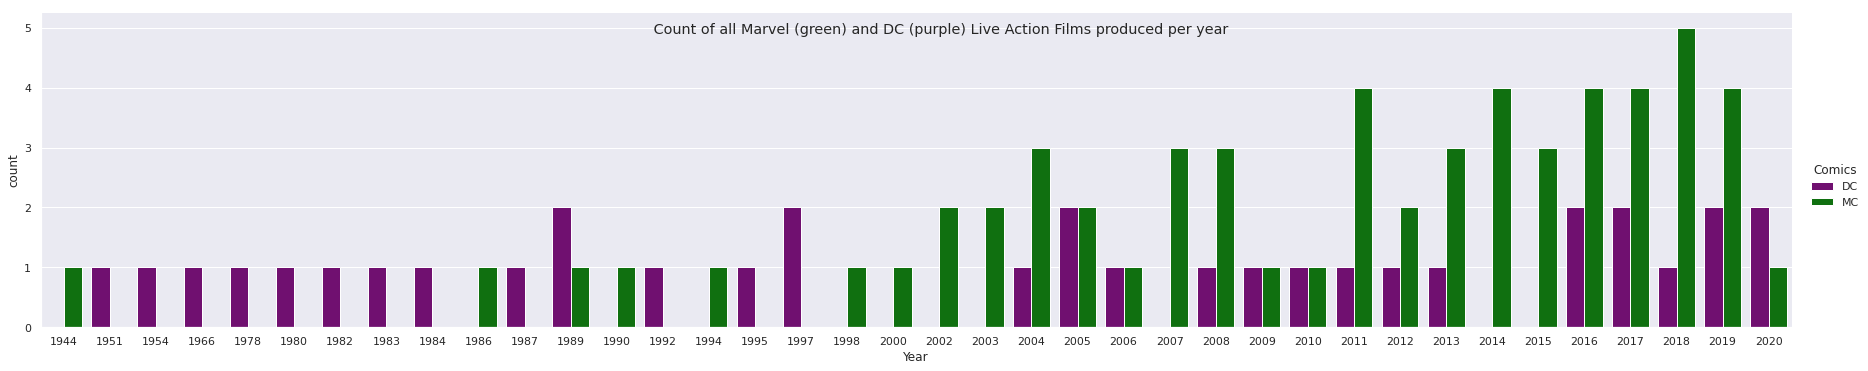

In [ ]:
df_both = pd.DataFrame(count_merge).reset_index()
df_both = df_both.rename(columns = {0: "count"})
df_both = df_both.sort_values('Year', ascending=False)

sns.set_theme(style="darkgrid")
ax = sns.catplot(data=df_both, kind="bar", x="Year", hue = 'Comics', y='count', height=5, aspect=5, palette=sns.color_palette(['purple', 'green']))
ax.fig.suptitle('\n Count of all Marvel (green) and DC (purple) Live Action Films produced per year')

##Showing the total number of Live Action Films produced up until 2020 

In [ ]:
both_sum = df_both[["Comics", 'count']]
both_sum= both_sum.groupby('Comics')['count'].sum()
both = pd.DataFrame(both_sum).reset_index()
both = both.rename(columns = {"count": "Count of Total Live Action Films"})
both

,Comics,Count of Total Live Action Films
0,DC,34
1,MC,59


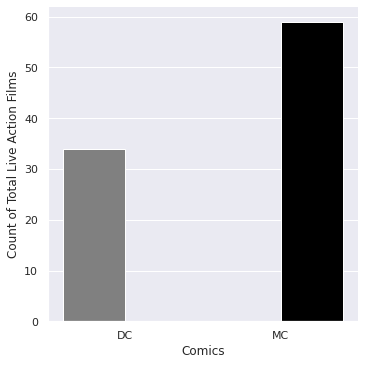

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.catplot(data=both, kind="bar", x="Comics", hue = 'Comics' , y='Count of Total Live Action Films', palette=sns.color_palette(['grey', 'black']))

## Showing table which contains Oscar Nomination count

In [ ]:
# Showing rows which contains the string "Oscar" in Notes column
mcdc_o = mcdc[mcdc['Notes'].str.contains(r"Oscar", na=False)]
mcdc_o.head()

,Year,Title,Production studio(s),Notes,Comics
3,1978,Superman,Dovemead Film Export A.G./International Film P...,"Won 1 Special Oscar, nominated for 3 more",DC
10,1989,Batman,Warner Bros./PolyGram Filmed Entertainment,Won 1 Oscar,DC
11,1992,Batman Returns,Warner Bros./PolyGram Filmed Entertainment,Nominated for 2 Oscars,DC
12,1995,Batman Forever,Warner Bros./PolyGram Filmed Entertainment,Nominated for 3 Oscars,DC
8,2002,Spider-Man,Columbia Pictures,Nominated for 2 Oscars,MC


In [ ]:
# Spliting strings, rearranging rows

oscar = mcdc_o[["Notes", "Comics"]]

ex = oscar.set_index(["Comics"]).apply(lambda col: col.str.split(',').explode()).reset_index().reindex(oscar.columns, axis=1)
ex['Notes'] = ex['Notes'].str.lstrip(" ")

ex = ex.set_index(["Comics"]).apply(lambda col: col.str.split(';').explode()).reset_index().reindex(ex.columns, axis=1)
ex['Notes'] = ex['Notes'].str.lstrip(" ")

ex = ex.set_index(["Comics"]).apply(lambda col: col.str.split('.').explode()).reset_index().reindex(ex.columns, axis=1)
ex['Notes'] = ex['Notes'].str.lstrip(" ")
# ex

exo = ex[ex['Notes'].str.contains("(N|n)ominated|Won")]

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [ ]:
# Finding integers in the strings and storing them in a new column
lst = []
for i in exo.index:
  try:
    x = re.findall('\d+', exo['Notes'][i])
    x=int(x[0])
    lst.append(x)
  except:
    lst.append(1)

exo['Nomination Count'] = lst

Recall that the Winning counts are considered as Nomination counts as they were nominated first and won later

In [ ]:
exo.head()

,Notes,Comics,Nomination Count
0,Won 1 Special Oscar,DC,1
1,nominated for 3 more,DC,3
2,Won 1 Oscar,DC,1
3,Nominated for 2 Oscars,DC,2
4,Nominated for 3 Oscars,DC,3


## Giving insights on which comics publication based films got more nominations for the Oscars than the other

Finding the Total Nomination Count for DC and MC

In [ ]:
exo_nom = exo[["Comics", 'Nomination Count']]
exo_nom_cat= exo_nom.groupby("Comics")['Nomination Count'].sum()
exo_nom_cat

Comics
DC    32
MC    26
Name: Nomination Count, dtype: int64

Finding the Total Number of Films based on DC and MC that got nominations

In [ ]:
nomcount = pd.DataFrame(exo_nom_cat).reset_index()
nomcount = nomcount.rename(columns = {'Nomination Count': "Total Oscar Nomination Count"})
m_oscar = oscar["Comics"].value_counts()
m_oscar

MC    15
DC     9
Name: Comics, dtype: int64

Notice the color corresponding to each publication

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


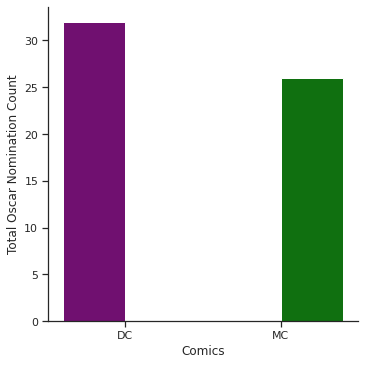

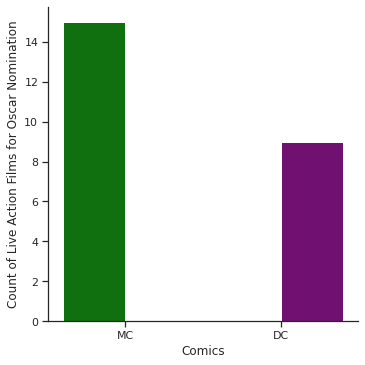

In [ ]:
moviecount = pd.DataFrame(m_oscar).reset_index()
moviecount = moviecount.rename(columns = {'index': "Comics", "Comics":"Count of Live Action Films for Oscar Nomination"})

sns.set(style="ticks")
fig, axs = plt.subplots(1,2)
sns.catplot(data=nomcount, kind="bar", x="Comics", hue = "Comics", y='Total Oscar Nomination Count', ax=axs[0], palette=sns.color_palette(['purple', 'green']))
sns.catplot(data=moviecount, kind="bar", x="Comics", hue = "Comics", y="Count of Live Action Films for Oscar Nomination", ax=axs[1],  palette=sns.color_palette(['green', 'purple']))
plt.close(1)
fig.tight_layout()

Interestingly, 9 DC Live Action Films had 32 nominations for the Oscars and 15 Marvel Comics Live Action Films (being more than DC) had overall 26 nominations (being less than DC)

In the next section, let's figure out which DC Action Film(s) are responsible for beating Marvel's Oscar nomination count by getting 32-26 = 6 more nominations.

##Finding the Live Action Film(s) based on the comics which is/are responsible for beating the other in nomination count

Since DC has more nomination count than Marvel, Let's bring all DC films which got nominations and count their total nominations individually

In [ ]:
tncat_o = mcdc_o[["Year","Title", "Notes", "Comics"]]
max_dc = tncat_o.loc[tncat_o["Comics"] == 'DC']
max_dc

,Year,Title,Notes,Comics
3,1978,Superman,"Won 1 Special Oscar, nominated for 3 more",DC
10,1989,Batman,Won 1 Oscar,DC
11,1992,Batman Returns,Nominated for 2 Oscars,DC
12,1995,Batman Forever,Nominated for 3 Oscars,DC
17,2005,Batman Begins,Reboot; nominated for an Oscar,DC
18,2006,Superman Returns,Alternate trilogy conclusion only to Superman ...,DC
19,2008,The Dark Knight,"Won 2 Oscars, nominated for 6 more",DC
26,2016,Suicide Squad,Set in the DCEU. Won an Oscar.,DC
31,2019,Joker,"Won 2 Oscars, nominated for 9 more",DC


In [ ]:
# Finding nomination counts as integer within the strings and storin them in a list
pst = []
for p in max_dc.index:
  x = re.findall('\d+', max_dc['Notes'][p])
  pst.append(x)

for h in pst:
  if len(h)==0:
    h.append(1)
  if len(h)==2:
    h[0]=int(h[0])
    h[1]=int(h[1])
  if len(h)==1:
    h[0]=int(h[0])

for q in range(len(pst)):
  if len(pst[q])==2:
    pst[q]=pst[q][0]+pst[q][1]
      
flattened_list = flatten(pst)
print(flattened_list)

[4, 1, 2, 3, 1, 1, 8, 1, 11]


In [ ]:
max_dc['Nomination Count'] = flattened_list
max_dc

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Year,Title,Notes,Comics,Nomination Count
3,1978,Superman,"Won 1 Special Oscar, nominated for 3 more",DC,4
10,1989,Batman,Won 1 Oscar,DC,1
11,1992,Batman Returns,Nominated for 2 Oscars,DC,2
12,1995,Batman Forever,Nominated for 3 Oscars,DC,3
17,2005,Batman Begins,Reboot; nominated for an Oscar,DC,1
18,2006,Superman Returns,Alternate trilogy conclusion only to Superman ...,DC,1
19,2008,The Dark Knight,"Won 2 Oscars, nominated for 6 more",DC,8
26,2016,Suicide Squad,Set in the DCEU. Won an Oscar.,DC,1
31,2019,Joker,"Won 2 Oscars, nominated for 9 more",DC,11


In [ ]:
max_dc1 = max_dc[max_dc['Nomination Count']==max_dc['Nomination Count'].max()]
max_dc1

,Year,Title,Notes,Comics,Nomination Count
31,2019,Joker,"Won 2 Oscars, nominated for 9 more",DC,11


So, in 2019, the film "Joker" really pulled up DC's overall nomination count beating Marvel

But which publication Won more Oscars? Marvel Comics or DC Comics?

Let's find out in the next section.

##Finding which publication has the most winning counts for Oscars based on Live Action Films

In [ ]:
won_o = exo[exo['Notes'].str.contains(r"(W|w)on", na=False)]
won_o

/usr/local/lib/python3.7/dist-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,Notes,Comics,Nomination Count
0,Won 1 Special Oscar,DC,1
2,Won 1 Oscar,DC,1
6,Won 1 Oscar,MC,1
13,Won 2 Oscars,DC,2
26,Won an Oscar,DC,1
31,Won 3 Oscars,MC,3
34,Won 2 Oscars,DC,2


In [ ]:
win_count = won_o.groupby("Comics")['Nomination Count'].sum()
win_count

Comics
DC    7
MC    4
Name: Nomination Count, dtype: int64

DC Films beat the Marvel Films on winning the Oscars!

##CONCLUSION

The purpose of webscraping, cleaning and analysing the data had been fulfilled. It was a very interesting topic to work with. The coding was mostly focused on fixing and rearranging the rows and needed a lot of calculations.

I found out that majority of the films based on Marvel got nominations than the films based on DC. But DC films got nominations in more categories than Marvel and beat Marvel by winning more Oscars as well!

However, whether DCU or MCU, I like to watch all of their films!